# 텐서플로 임포트

In [3]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# MNIST dataset

In [4]:
# MNIST DATA
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


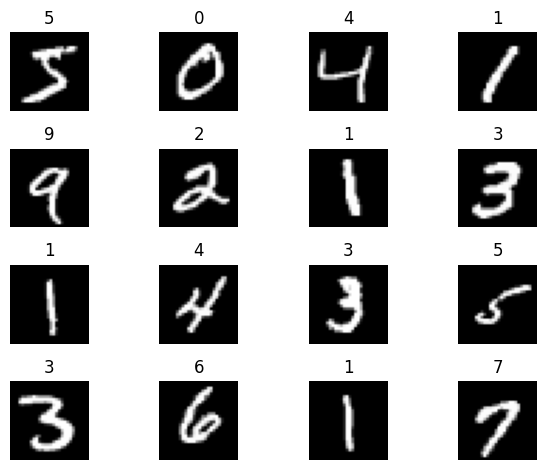

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4)
for i in range(16):
    ax = axes[i//4, i%4]
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))
plt.tight_layout()
plt.show()

# 전처리

In [6]:
# 데이터 정규화
x_train = x_train / 255.
x_test = x_test / 255.

In [7]:
# Flatten
x_train = x_train.reshape(60000, -1)
print(x_train.shape)

(60000, 784)


In [8]:
x_test = x_test.reshape(10000, -1)
print(x_test.shape)

(10000, 784)


# Sequential API

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

seq_m = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax'),
])

seq_m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


In [13]:
seq_m.trainable = True

seq_m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


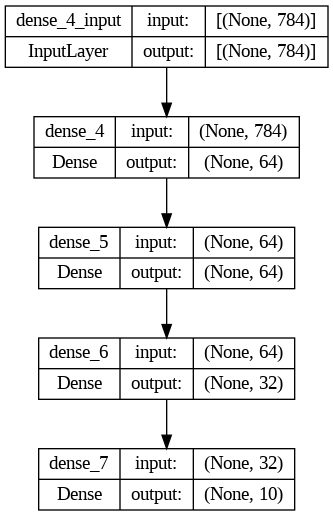

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(seq_m, show_shapes=True, show_layer_names=True, to_file='sequence_api.png')

In [15]:
# 학습방법 설정
seq_m.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# 모델 학습/ 교차검증
history_seq = seq_m.fit(x_train, y_train,
                        validation_split=0.2,
                        #   validation_data=(x_test, y_test),
                        epochs=30,
                        batch_size=64,
                        )

Epoch 1/30
750/750 [==============================] - 9s 4ms/step - loss: 0.3805 - accuracy: 0.8910 - val_loss: 0.1916 - val_accuracy: 0.9427
Epoch 2/30
750/750 [==============================] - 4s 5ms/step - loss: 0.1612 - accuracy: 0.9523 - val_loss: 0.1373 - val_accuracy: 0.9591
Epoch 3/30
750/750 [==============================] - 3s 4ms/step - loss: 0.1176 - accuracy: 0.9647 - val_loss: 0.1304 - val_accuracy: 0.9613
Epoch 4/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0929 - accuracy: 0.9719 - val_loss: 0.1332 - val_accuracy: 0.9606
Epoch 5/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0774 - accuracy: 0.9765 - val_loss: 0.1179 - val_accuracy: 0.9650
Epoch 6/30
750/750 [==============================] - 5s 6ms/step - loss: 0.0639 - accuracy: 0.9803 - val_loss: 0.1167 - val_accuracy: 0.9668
Epoch 7/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0573 - accuracy: 0.9816 - val_loss: 0.1165 - val_accuracy: 0.9682
Epoch 

KeyboardInterrupt: ignored

<Figure size 576x288 with 0 Axes>

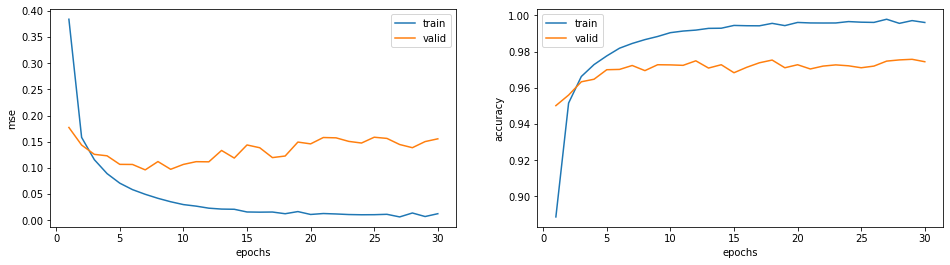

In [ ]:
# history (로그 시각화)
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].plot(range(1, 31),
         history_seq.history['loss'][0:30],
         label='train')
axes[0].plot(range(1, 31),
         history_seq.history['val_loss'][0:30],
         label='valid')
axes[0].set_xlabel('epochs')
axes[0].set_ylabel('mse')
axes[0].legend()

axes[1].plot(range(1, 31),
         history_seq.history['accuracy'][0:30],
         label='train')
axes[1].plot(range(1, 31),
         history_seq.history['val_accuracy'][0:30],
         label='valid')
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('accuracy')
axes[1].legend()

plt.show()

# 과적합 방지

### L1, L2 규제

In [ ]:
seq_m = Sequential([
    Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.l1(0.01), input_shape=(784,)),
    Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
    Dense(10, activation='softmax'),
])

seq_m.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history_seq = seq_m.fit(x_train, y_train,
                        validation_split=0.2,
                        epochs=100,
                        batch_size=64,
                        verbose=2,
                        )

Epoch 1/100
750/750 - 3s - loss: 3.1815 - acc: 0.6343 - val_loss: 1.5926 - val_acc: 0.7714 - 3s/epoch - 4ms/step
Epoch 2/100
750/750 - 2s - loss: 1.5236 - acc: 0.7787 - val_loss: 1.4169 - val_acc: 0.8068 - 2s/epoch - 3ms/step
Epoch 3/100
750/750 - 2s - loss: 1.3856 - acc: 0.8146 - val_loss: 1.3003 - val_acc: 0.8372 - 2s/epoch - 3ms/step
Epoch 4/100
750/750 - 2s - loss: 1.2908 - acc: 0.8340 - val_loss: 1.2201 - val_acc: 0.8506 - 2s/epoch - 3ms/step
Epoch 5/100
750/750 - 2s - loss: 1.2250 - acc: 0.8418 - val_loss: 1.1788 - val_acc: 0.8547 - 2s/epoch - 2ms/step
Epoch 6/100
750/750 - 2s - loss: 1.1750 - acc: 0.8456 - val_loss: 1.1380 - val_acc: 0.8562 - 2s/epoch - 3ms/step
Epoch 7/100
750/750 - 2s - loss: 1.1386 - acc: 0.8494 - val_loss: 1.0999 - val_acc: 0.8594 - 2s/epoch - 2ms/step
Epoch 8/100
750/750 - 2s - loss: 1.1092 - acc: 0.8526 - val_loss: 1.0715 - val_acc: 0.8587 - 2s/epoch - 2ms/step
Epoch 9/100
750/750 - 2s - loss: 1.0831 - acc: 0.8540 - val_loss: 1.0495 - val_acc: 0.8630 - 2s/

In [ ]:
# history (로그 시각화)

def plot_loss_accuracy(history, epochs: int):

    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].plot(range(1, epochs+1),
            history.history['loss'][0:epochs],
            label='train')
    axes[0].plot(range(1, epochs+1),
            history.history['val_loss'][0:epochs],
            label='valid')
    axes[0].set_xlabel('epochs')
    axes[0].set_ylabel('mse')
    axes[0].legend()

    axes[1].plot(range(1, epochs+1),
            history.history['acc'][0:epochs],
            label='train')
    axes[1].plot(range(1, epochs+1),
            history.history['val_acc'][0:epochs],
            label='valid')
    axes[1].set_xlabel('epochs')
    axes[1].set_ylabel('accuracy')
    axes[1].legend()

    plt.show()

<Figure size 576x288 with 0 Axes>

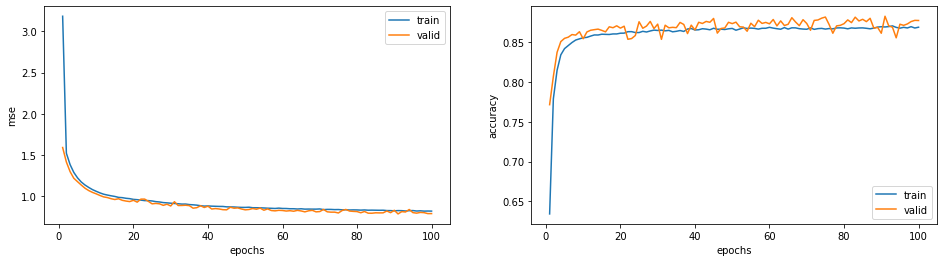

In [ ]:
plot_loss_accuracy(history_seq, epochs=100)

## Dropout

In [24]:
from tensorflow.keras.layers import Dropout
# seq_m = Sequential([
#     Dense(64, activation='relu', input_shape=(784,)),
#     Dense(64, activation='relu'),
#     Dense(32, activation='relu'),
#     Dropout(0.5),
#     Dense(10, activation='softmax'),
# ])

# seq_m.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['acc'])

# history_seq = seq_m.fit(x_train, y_train,
#                         validation_split=0.2,
#                         epochs=30,
#                         batch_size=64,
#                         verbose=2,
#                         )

<Figure size 576x288 with 0 Axes>

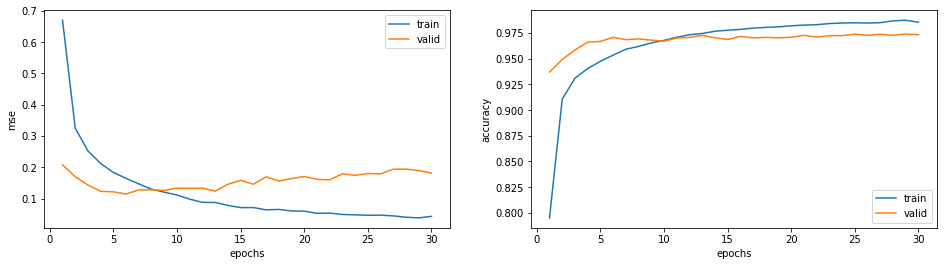

In [ ]:
plot_loss_accuracy(history_seq, epochs=30)

## BatchNormalization

In [20]:
from tensorflow.keras.layers import BatchNormalization
# seq_m = Sequential([
#     Dense(64, activation='relu', input_shape=(784,)),
#     BatchNormalization(),
#     Dense(64, activation='relu'),
#     BatchNormalization(),
#     Dense(32, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(10, activation='softmax'),
# ])

# seq_m.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['acc'])

# history_seq = seq_m.fit(x_train, y_train,
#                         validation_split=0.2,
#                         epochs=30,
#                         batch_size=64,
#                         verbose=2,
#                         )

<Figure size 576x288 with 0 Axes>

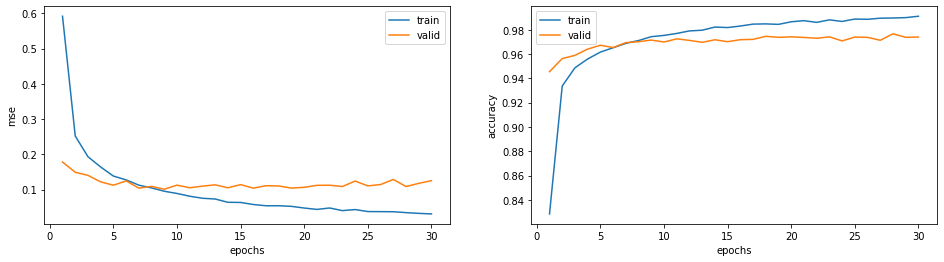

In [ ]:
plot_loss_accuracy(history_seq, epochs=30)

## Early Stopping  



In [ ]:
seq_m = Sequential([
    Dense(256, activation='relu', kernel_regularizer = tf.keras.regularizers.l1(0.01), input_shape=(784,)),
    BatchNormalization(),
    Dense(256, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

seq_m.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [21]:
# 콜백(callback)
from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_acc', patience=7, min_delta=0.001)
# history_seq = seq_m.fit(x_train, y_train,
#                         validation_split=0.2,
#                         epochs=50,
#                         batch_size=64,
#                         verbose=2,
#                         callbacks=[early_stopping],
#                         )

# 함수형 API

In [22]:
from tensorflow.keras import Model, Input

# # 모델 Input
# inp = Input(shape=(784,), name='Input')

# # 함수 형식의 체인 구조
# h1 = Dense(256, activation='relu', name='hidden1')(inp)
# h2 = Dense(256, activation='relu', name='hidden2')(h1)
# h3 = Dense(64, activation='relu', name='hidden3')(h2)
# h4 = Dense(32, activation='relu', name='hidden4')(h3)
# out = Dense(10, activation='softmax', name='Output')(h4)

# # 모델 생성 - 입력과 출력을 연결
# func_m = Model(inputs=inp, outputs=out, name='func_m')
# func_m.summary()

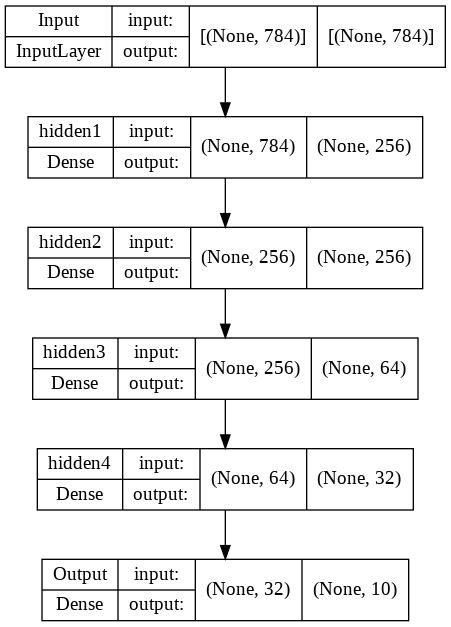

In [ ]:
plot_model(func_m, show_shapes=True, show_layer_names=True, to_file='functional_api.png')

## 다중 출력

In [18]:
# 새로운 출력값 배열을 생성 (홀수: 1, 짝수: 0)
import numpy as np
y_train_new = np.where(y_train % 2 == 0, 0, 1)
y_test_new = np.where(y_test % 2 == 0, 0, 1)
y_train_new

array([1, 0, 0, ..., 1, 0, 0])

In [25]:
# Functional API를 사용하여 모델 생성

inp = Input(shape=(784,), name='input')

x = Dense(256, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01))(inp)
x = BatchNormalization()(x)
x = Dense(256, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01))(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
odd_out = Dense(1, activation='sigmoid', name='odd_output')(x)

x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
digit_out = Dense(10, activation='softmax', name='digit_output')(x)

multiout_m = Model(inputs=inp, outputs=[digit_out, odd_out], name='multiout_model')
multiout_m.summary()

Model: "multiout_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 784)]        0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 256)          200960      ['input[0][0]']                  
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 256)         1024        ['dense_13[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 dense_14 (Dense)               (None, 256)          65792       ['batch_normalizatio

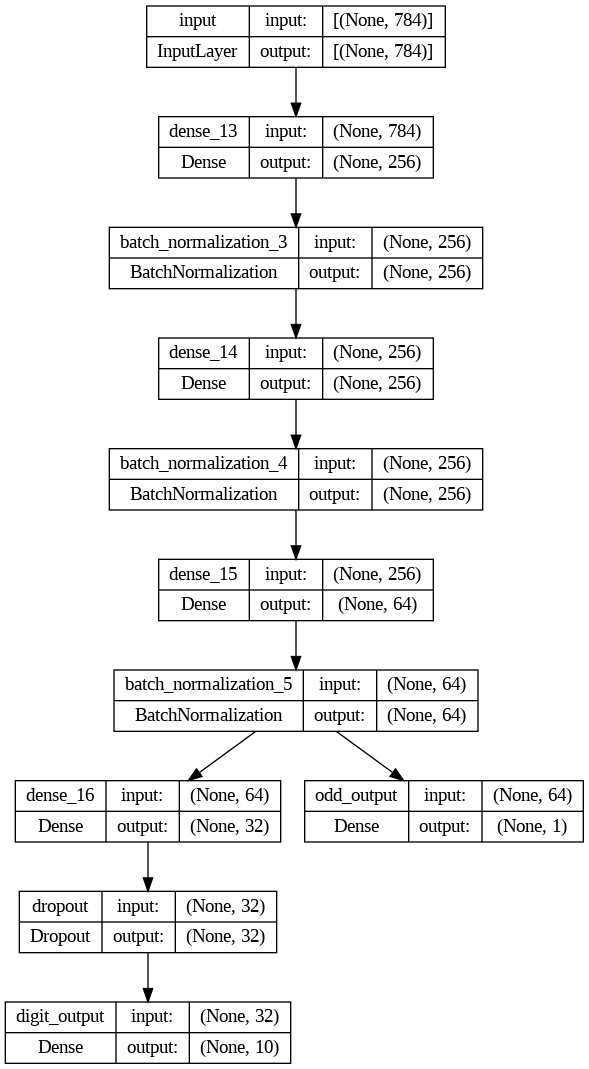

In [26]:
plot_model(multiout_m, show_shapes=True, show_layer_names=True, to_file='multiout_model.png')

In [ ]:
# 모델 컴파일
multiout_m.compile(optimizer='adam',
                    loss={'odd_output': 'binary_crossentropy', 'digit_output': 'sparse_categorical_crossentropy'},
                    loss_weights={'odd_output': 0.5, 'digit_output': 0.5},
                    metrics=['acc'])

# 모델 훈련
history_multi = multiout_m.fit({'input': x_train}, {'odd_output': y_train_new, 'digit_output': y_train},
                    validation_data=({'input': x_test},  {'odd_output': y_test_new, 'digit_output': y_test}),
                    epochs=100)

Epoch 1/100
1875/1875 [==============================] - 36s 5ms/step - loss: 1.0997 - digit_output_loss: 0.5994 - odd_output_loss: 0.1515 - digit_output_acc: 0.8299 - odd_output_acc: 0.9442 - val_loss: 0.4102 - val_digit_output_loss: 0.2453 - val_odd_output_loss: 0.1006 - val_digit_output_acc: 0.9259 - val_odd_output_acc: 0.9627
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4919 - digit_output_loss: 0.4342 - odd_output_loss: 0.1241 - digit_output_acc: 0.8854 - odd_output_acc: 0.9554 - val_loss: 0.4277 - val_digit_output_loss: 0.3332 - val_odd_output_loss: 0.1366 - val_digit_output_acc: 0.9011 - val_odd_output_acc: 0.9489
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4297 - digit_output_loss: 0.3873 - odd_output_loss: 0.1166 - digit_output_acc: 0.8984 - odd_output_acc: 0.9599 - val_loss: 0.3288 - val_digit_output_loss: 0.2480 - val_odd_output_loss: 0.0848 - val_digit_output_acc: 0.9309 - val_odd_output_acc: 0.9691
Epoch 

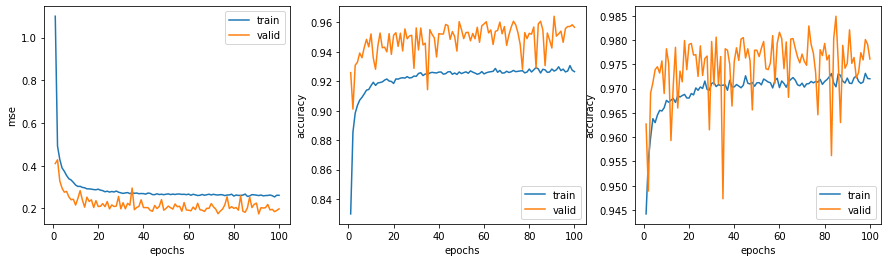

In [ ]:
# history (로그 시각화)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].plot(range(1, 101),
         history_multi.history['loss'][0:100],
         label='train')
axes[0].plot(range(1, 101),
         history_multi.history['val_loss'][0:100],
         label='valid')
axes[0].set_xlabel('epochs')
axes[0].set_ylabel('mse')
axes[0].legend()

axes[1].plot(range(1, 101),
         history_multi.history['digit_output_acc'][0:100],
         label='train')
axes[1].plot(range(1, 101),
         history_multi.history['val_digit_output_acc'][0:100],
         label='valid')
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('accuracy')
axes[1].legend()

axes[2].plot(range(1, 101),
         history_multi.history['odd_output_acc'][0:100],
         label='train')
axes[2].plot(range(1, 101),
         history_multi.history['val_odd_output_acc'][0:100],
         label='valid')
axes[2].set_xlabel('epochs')
axes[2].set_ylabel('accuracy')
axes[2].legend()

plt.show()

# [실습] creditcard.csv 파일을 읽어서, 부정사용을 탐지하는 모델을 개발합니다.  

- Machine Learning
- Deep Learning